### Import packages
Import necessry packages needed

In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import import_ipynb
import Planar_data_classification_lab_2_1 as l1
import Planar_data_classification_lab_2_2 as l2
import Planar_data_classification_lab_2_3 as l3
import Planar_data_classification_lab_2_4 as l4
%matplotlib inline

importing Jupyter notebook from Planar_data_classification_lab_2_1.ipynb
importing Jupyter notebook from Planar_data_classification_lab_2_2.ipynb
importing Jupyter notebook from Planar_data_classification_lab_2_3.ipynb
importing Jupyter notebook from Planar_data_classification_lab_2_4.ipynb


### Training the model

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.
- Use the `nn_model()` to calculate the model parameters on the X,Y data imported in *lab_2_1*.
- Use the `predict()` to calculate the model predections on X and plot the decision boundries.

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

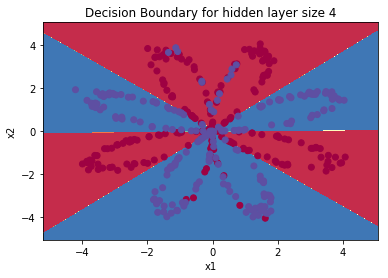

In [2]:
X, Y= load_planar_dataset()
n_h = 4
# Build a model with a n_h-dimensional hidden layer
parameters = l4.nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False)

# Plot the decision boundary
plot_decision_boundary(lambda x: l4.predict(parameters, x.T), X, Y.ravel())
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [3]:
# Print accuracy
predictions = l4.predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

Now, let's try out several hidden layer sizes.

### Tuning hidden layer size  ###

In the following code, populate the *hidden_layer_sizes* list with different values such as $[1, 2, 3, 4, 5, 20, 50]$. It may take few minutes. You will observe different behaviors of the model for various hidden layer sizes.

Accuracy for 5 hidden units: 91.5 %


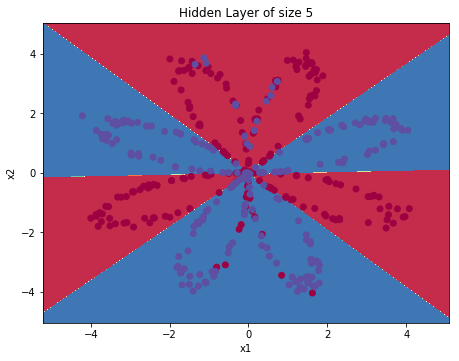

In [7]:
# This may take few minutes to run

plt.figure(figsize=(16, 32))
# populate with different layer size
hidden_layer_sizes = [5]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = l4.nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: l4.predict(parameters, x.T), X, Y.ravel())
    predictions = l4.predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 